In [1]:
import warnings

from HW1.coord_relaxer import LinearCoordRelaxer
from HW1.visualize import draw_2D, draw_3D
from grad import *

Метод золотого сечения.
---

0. Берем отрезок [a, b]
1. Ставим на нем две точки `x1` и `x2` в пропорции золотого сечения.
    $x_1 = b - {b - a \over \phi}$
    $x_2 = a + {b - a \over \phi}$
2. Считаем значения в этих точках
    $y_1 = f(x_1)$
    $y_2 = f(x_2)$
3. Проверяем, если $|y_1 - y_2| < \varepsilon$, значит мы достаточно близко к ответу (с точностью $\varepsilon$). Здачит, завершаем программу.
4. Сдвигаем границы
    Если $y_1 \leq y_2 \Rightarrow b = x_2, x_2 = x_1, x_1 = b - {b - a \over \phi}, y_2 = y_1, y_1 = f(x_1)$
    Если $y_2 \leq y_1 \Rightarrow a = x_1, x_1 = x_2, x_2 = a + {b - a \over \phi}, y_1 = y_2, y_2 = f(x_2)$
5. Возвращаемся к пункту `3`

# Example 1

> $dim = 1$.
>
> $f(x) = x - sin(x)$, where $x \geq 0; -x$, otherwise

In [2]:
def f(coord):
    if coord >= 0:
        return coord - np.sin(coord)
    else:
        return -coord

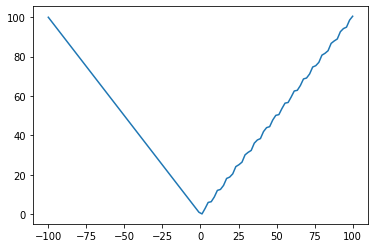

In [3]:
draw_2D(f)

[25.16963763] [25.1327496]
{'gradient_call_count': 108, 'function_call_count': 1633, 'points': array([[30.19808311, 31.13643918],
       [29.87092135, 30.87058878],
       [29.38381839, 30.27928774],
       [28.66125947, 29.03860253],
       [27.69822624, 27.15346226],
       [26.77893492, 25.78177596],
       [26.24127515, 25.34622934],
       [25.96426492, 25.2253061 ],
       [25.80114277, 25.18141048],
       [25.69355213, 25.16167907],
       [25.6169673 , 25.15144376],
       [25.55948885, 25.14557655],
       [25.5146502 , 25.14195761],
       [25.47863001, 25.13959706],
       [25.44902043, 25.13798795],
       [25.42422272, 25.13685118],
       [25.40313597, 25.13602411],
       [25.38497188, 25.13540723],
       [25.36915369, 25.1349373 ],
       [25.35524834, 25.13457272],
       [25.34292542, 25.13428538],
       [25.33192475, 25.13405569],
       [25.32204175, 25.13386979],
       [25.3131123 , 25.13371766],
       [25.30500457, 25.13359194],
       [25.29760759, 25.133487

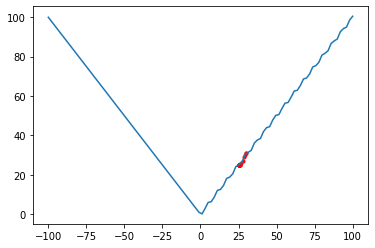

In [4]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    (x, y), meta = gradient_descent(f, 1, coord_relaxer=LinearCoordRelaxer(f, alpha=5, eps=1e-5))
    print(x, y)
    print(meta)

    draw_2D(f, meta["points"])

# Example 2

> $dim = 2$.
>
> $f(x, y) = sin(x / 20) * cos(e + y / 20)$

In [5]:
def f(coord):
    return np.sin(coord[0] / 20) * np.cos(np.e + coord[1] / 20)

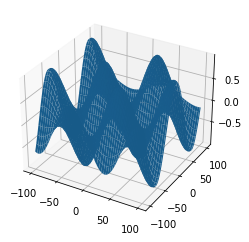

In [6]:
draw_3D(f)

/home/easyhacks/Документы/git/Optimization-Methods-IFMO/HW1/grad.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([coord, f(coord)]).reshape(1, 2),


[-31.62665211 -54.46934774] -0.9999310496958708
{'gradient_call_count': 818, 'function_call_count': 11892, 'points': array([[array([-54.62067324, -60.81038567]), -0.378578809314434],
       [array([-54.51229781, -60.79492226]), -0.38338478512401264],
       [array([-54.40415172, -60.77930285]), -0.38817277121947896],
       ...,
       [array([-31.6286788 , -54.47015357]), -0.999929767175822],
       [array([-31.62766303, -54.46974988]), -0.9999304114085454],
       [array([-31.62665211, -54.46934774]), -0.9999310496958708]],
      dtype=object)}


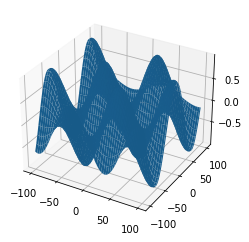

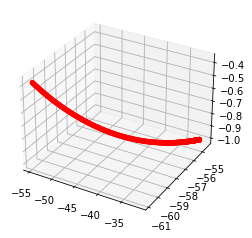

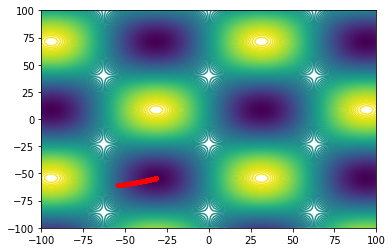

In [7]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    (xs, y), meta = gradient_descent(f, 2, lr=0.5, coord_relaxer=LinearCoordRelaxer(f, alpha=5, eps=1e-3))
    print(xs, y)
    print(meta)

    draw_3D(f, meta["points"])